# KNN
## K-Nearest Neighbors
## Beispiel
### Erklärung

In diesem Beispiel sehen wir eine einfache Klassifikation mit zwei Klassen. Die grünen Dreiecke und gelben Quadrate repräsentieren die Trainingsinstanzen, die zu zwei verschiedenen Klassen gehören. Die “New instance” ist der neue Datenpunkt, den wir klassifizieren möchten. Der Abstand zu den nächsten Nachbarn wird gemessen, um die Klassenzugehörigkeit zu bestimmen.

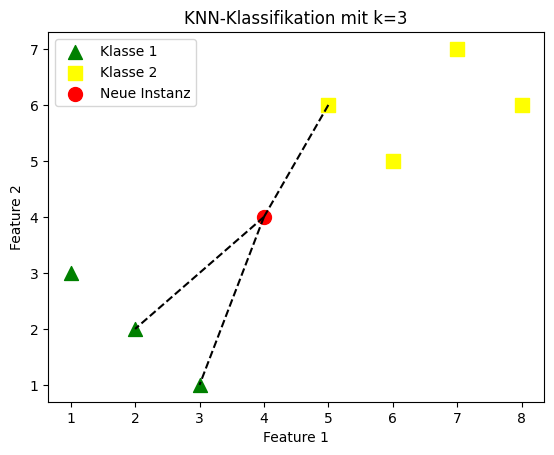

In [1]:
import matplotlib.pyplot as plt

# Datenpunkte
green_triangles = [(1, 3), (2, 2), (3, 1)]
yellow_squares = [(5, 6), (6, 5), (7, 7), (8, 6)]
new_instance = (4, 4)

# Plot der Punkte
plt.scatter(*zip(*green_triangles), color='green', marker='^', s=100, label='Klasse 1')
plt.scatter(*zip(*yellow_squares), color='yellow', marker='s', s=100, label='Klasse 2')
plt.scatter(*new_instance, color='red', marker='o', s=100, label='Neue Instanz')

# Verbindungslinien (Distanz)
neighbors = [(3, 1), (5, 6), (2, 2)]
for neighbor in neighbors:
    plt.plot([new_instance[0], neighbor[0]], [new_instance[1], neighbor[1]], 'k--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('KNN-Klassifikation mit k=3')
plt.show()

Erklärung

Hier sehen wir ein ähnliches Szenario, bei dem der neue Punkt (rote Kreis) klassifiziert werden soll. Wir betrachten die k=3 nächsten Nachbarn. In diesem Fall sind zwei von drei Nachbarn grüne Dreiecke (Klasse 1) und einer ist ein gelbes Quadrat (Klasse 2). Daher wird die neue Instanz höchstwahrscheinlich zur Klasse 1 gehören.

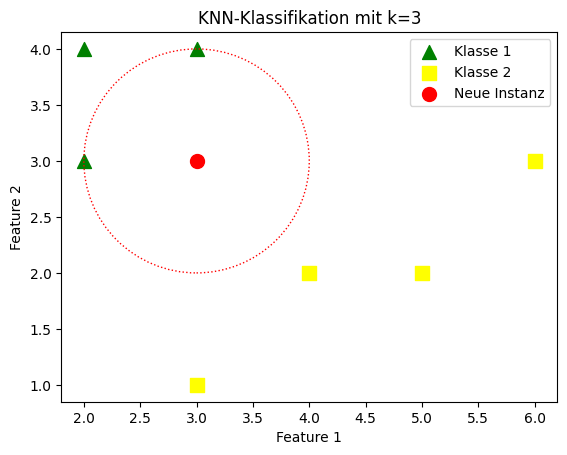

In [2]:

# Datenpunkte
green_triangles = [(2, 3), (2, 4), (3, 4)]
yellow_squares = [(3, 1), (4, 2), (5, 2), (6, 3)]
new_instance = (3, 3)

# Plot der Punkte
plt.scatter(*zip(*green_triangles), color='green', marker='^', s=100, label='Klasse 1')
plt.scatter(*zip(*yellow_squares), color='yellow', marker='s', s=100, label='Klasse 2')
plt.scatter(*new_instance, color='red', marker='o', s=100, label='Neue Instanz')

# Kreise um die nächsten Nachbarn zu zeigen
circle = plt.Circle(new_instance, 1, color='r', fill=False, linestyle='dotted')
plt.gca().add_artist(circle)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('KNN-Klassifikation mit k=3')
plt.show()

## Einführung

Das Grundprinzip hinter K-Nearest Neighbors (KNN) kann sowohl für Klassifikation als auch Regression verwendet werden, wir betrachten jedoch nur die Klassifikation. Wir beginnen wieder beim optimalen Bayes-Klassifikator mit den Klassen $C_1, \ldots, C_m$. Wie gewohnt entscheiden wir uns bei gegebenem $x \in X$ für die Klasse mit der größten Wahrscheinlichkeit:

$$
f(x) = \arg \max_{C_j \in \{C_1, \ldots, C_m\}} \Pr(y = C_j | X = x)
$$


Leider ist die tatsächliche Funktion $\Pr(y = C_j | X = x)$ meist nicht bekannt. Im Fall der binären logistischen Regression zum Beispiel hatten wir daher angenommen, dass die Funktion für Features $x \in \mathbb{R}^d$ ausreichend gut approximiert werden kann durch:

$$
\Pr(y = 1| X = x) = \frac{e^{w^T x}}{1 + e^{w^T x}}
$$

mit Hilfe der Parameter $w \in \mathbb{R}^{d+1}$.

## Algorithmus
Bei der KNN-Klassifikation wollen wir keine direkte Formel für die Wahrscheinlichkeiten $\Pr(y = C_j | X = x)$ angeben und somit auch ohne Parameter auskommen, welche die Form dieser Funktionen bestimmt. KNN-Klassifikation ist somit eine nicht-parametrische, lokale Methode.

Die Idee ist, dass wir uns alle Punkte $x^{(i)}$ zusammen mit ihrer Klasse $y^{(i)}$, welche im Trainingsdatensatz

$$
T = \{(x^{(i)}, y^{(i)}) | 1 \leq i \leq n\}
$$

enthalten sind, direkt merken (anstelle einer Trainingsphase wie in den anderen Methoden üblich).

Für die eigentliche Klassifikation nehmen wir nun an, dass ein zu klassifizierender Datenpunkt $x$ die gleiche Klasse hat, wie die Trainingsdatenpunkte in seiner Nähe.


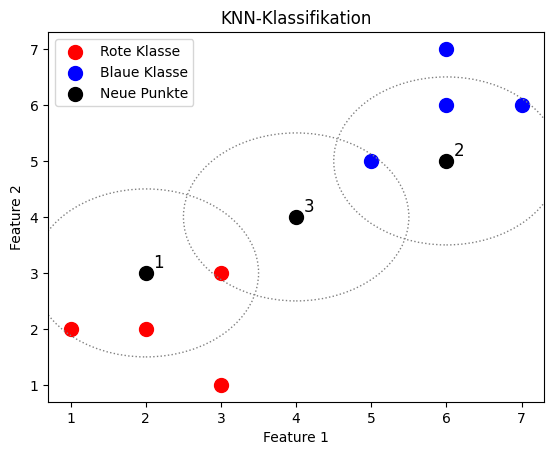

In [3]:


# Datenpunkte
red_class = [(1, 2), (2, 2), (3, 3), (3, 1)]
blue_class = [(6, 6), (5, 5), (7, 6), (6, 7)]
points = [(2, 3), (6, 5), (4, 4)]

# Plot der Punkte
plt.scatter(*zip(*red_class), color='red', marker='o', s=100, label='Rote Klasse')
plt.scatter(*zip(*blue_class), color='blue', marker='o', s=100, label='Blaue Klasse')
plt.scatter(*zip(*points), color='black', marker='o', s=100, label='Neue Punkte')

# Annotationen für neue Punkte
for i, point in enumerate(points):
    plt.annotate(f'{i+1}', (point[0]+0.1, point[1]+0.1), fontsize=12, color='black')

# Kreise um die neuen Punkte
circles = [plt.Circle(point, 1.5, color='gray', fill=False, linestyle='dotted') for point in points]
for circle in circles:
    plt.gca().add_artist(circle)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('KNN-Klassifikation')
plt.show()

### Erklärung
KNN-Klassifikation: Punkt 1 gehört wohl wahrscheinlich zur roten Klasse, Punkt 2 zur blauen Klasse und bei Punkt 3 ist die Klasse nicht deutlich erkennbar.

Um genauer zu definieren, was mit Nähe gemeint ist, wollen wir als Distanzmetrik den euklidischen Abstand zwischen zwei Punkten $x, x' \in \mathbb{R}^d$ definieren als:

$$
\text{dist}(x, x') = \|x - x'\|_2 = \sqrt{\sum_{i=1}^d (x_i - x'_i)^2}
$$

Auch andere Distanzen sind möglich, z.B. die Manhattan-Distanz.

Gegeben eine Menge von Trainingspunkten

$$
T = \{(x^{(i)}, y^{(i)}) | 1 \leq i \leq n\}
$$

und einen Punkt $x$, definieren wir mit

$$
N^k(x) \subseteq T
$$

die Menge der $k$ Trainingspunkte $(x^{(i)}, y^{(i)}) \in T$ mit der geringsten Distanz $\text{dist}(x, x^{(i)})$ zum Punkt $x$. Logischerweise gilt

$$
|N^k(x)| = k.
$$

Wir können nun die Wahrscheinlichkeit der Klassenzugehörigkeit eines Punktes zu einer Klasse im Sinne der KNN-Klassifikation definieren als:

$$
\Pr(y = C_j | X = x) = \frac{| \{(x^{(i)}, y^{(i)}) \in N^k(x) | y^{(i)} = C_j \} |}{k}
$$

### Beispiel: KNN-Klassifikation mit zwei Klassen und k = 3.

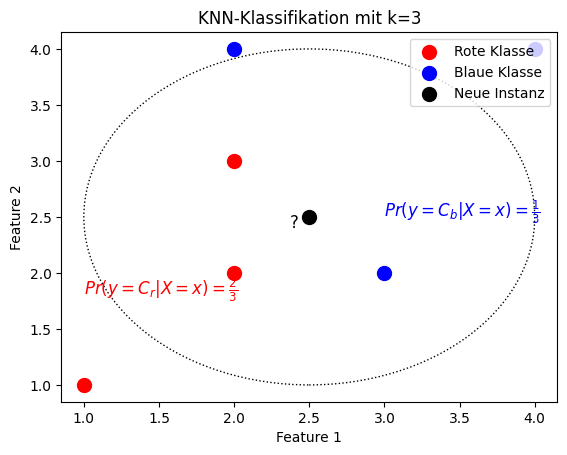

In [9]:

# Datenpunkte
red_class = [(1, 1), (2, 2), (2, 3)]  # Hinzugefügter roter Punkt
blue_class = [(3, 2), (4, 4), (2, 4)]
new_instance = (2.5, 2.5)

# Plot der Punkte
plt.scatter(*zip(*red_class), color='red', marker='o', s=100, label='Rote Klasse')
plt.scatter(*zip(*blue_class), color='blue', marker='o', s=100, label='Blaue Klasse')
plt.scatter(*new_instance, color='black', marker='o', s=100, label='Neue Instanz')

# Kreise um die neuen Punkte
circle = plt.Circle(new_instance, 1.5, color='black', fill=False, linestyle='dotted')
plt.gca().add_artist(circle)

plt.text(new_instance[0] - 0.1, new_instance[1] - 0.1, '?', fontsize=12, ha='center')
plt.annotate('$Pr(y = C_r | X = x) = \\frac{2}{3}$', (1, 1.8), color='red', fontsize=12)
plt.annotate('$Pr(y = C_b | X = x) = \\frac{1}{3}$', (3, 2.5), color='blue', fontsize=12)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('KNN-Klassifikation mit k=3')
plt.show()

### Beispiel KNN-Klassifikation mit drei Klassen und k = 6.

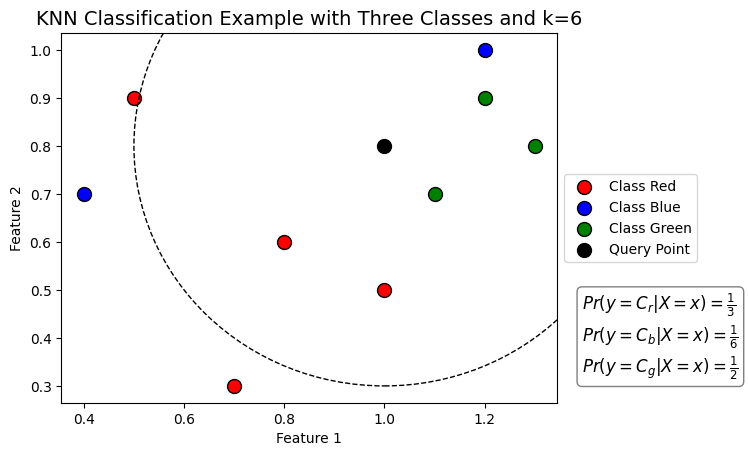

In [17]:

# Data points
red_points = [(0.5, 0.9), (0.7, 0.3), (0.8, 0.6), (1.0, 0.5)]
blue_points = [(0.4, 0.7), (1.2, 1.0)]
green_points = [(1.1, 0.7), (1.3, 0.8), (1.2, 0.9)]
query_point = (1.0, 0.8)

# Create the plot
fig, ax = plt.subplots()

# Plot data points
ax.scatter(*zip(*red_points), color='red', edgecolor='k', s=100, label='Class Red')
ax.scatter(*zip(*blue_points), color='blue', edgecolor='k', s=100, label='Class Blue')
ax.scatter(*zip(*green_points), color='green', edgecolor='k', s=100, label='Class Green')
ax.scatter(*query_point, color='black', edgecolor='k', s=100, label='Query Point', marker='o')

# Draw the circle around the query point
circle = plt.Circle(query_point, 0.5, color='black', linestyle='--', fill=False)
ax.add_artist(circle)

# Set labels
ax.set_title('KNN Classification Example with Three Classes and k=6', fontsize=14)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Move the legend outside the plot
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Annotate probabilities below the legend
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(1.05, 0.3, r'$Pr(y = C_r | X = x) = \frac{1}{3}$' '\n' r'$Pr(y = C_b | X = x) = \frac{1}{6}$' '\n' r'$Pr(y = C_g | X = x) = \frac{1}{2}$',
        transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)

plt.show()



### Beispiel: binären Klassifikation mit Hilfe KNN(k = 10). Die gelernte KNN-Entscheidungsgrenze approximiert die des optimalen Bayes Klassifizierer relativ gut.

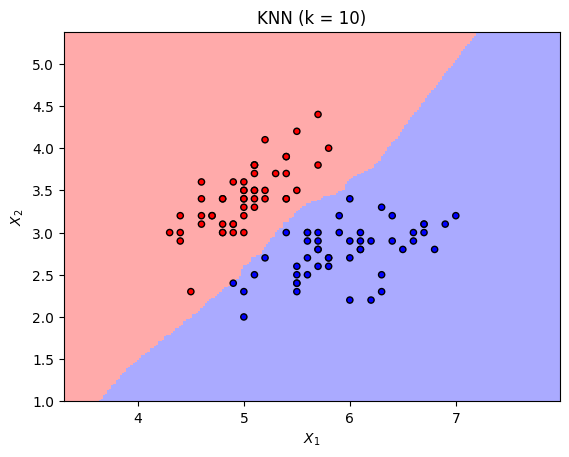

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Erzeugen eines Datensatzes
n_neighbors = 10

# Laden eines Datensatzes (z.B. Iris-Datensatz)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Nur die ersten beiden Features
y = iris.target

# Nur zwei Klassen für binäre Klassifikation verwenden
X = X[y != 2]
y = y[y != 2]

h = .02  # Schrittgröße im Mesh

# Erstellen der Farbkarte
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# KNN-Klassifikator anpassen
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

# Erzeugen eines Gitters zum Plotten
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Vorhersagen für jedes Punkt im Gitter
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Das Ergebnis in eine Farbkarte umformen
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot der Trainingspunkte
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'KNN (k = {n_neighbors})')

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

K-Nearest Neighbors Methoden besitzen normalerweise einen einzigen Hyperparameter $k \in \mathbb{N}$, welcher maßgeblich die Leistung beeinflusst. Ziel sollte daher sein, den Hyperparameter $k$ zu optimieren, um:

- die Fehlerrate auf dem Testdatensatz zu minimieren bzw. äquivalent dazu,
- die Genauigkeit zu maximieren.

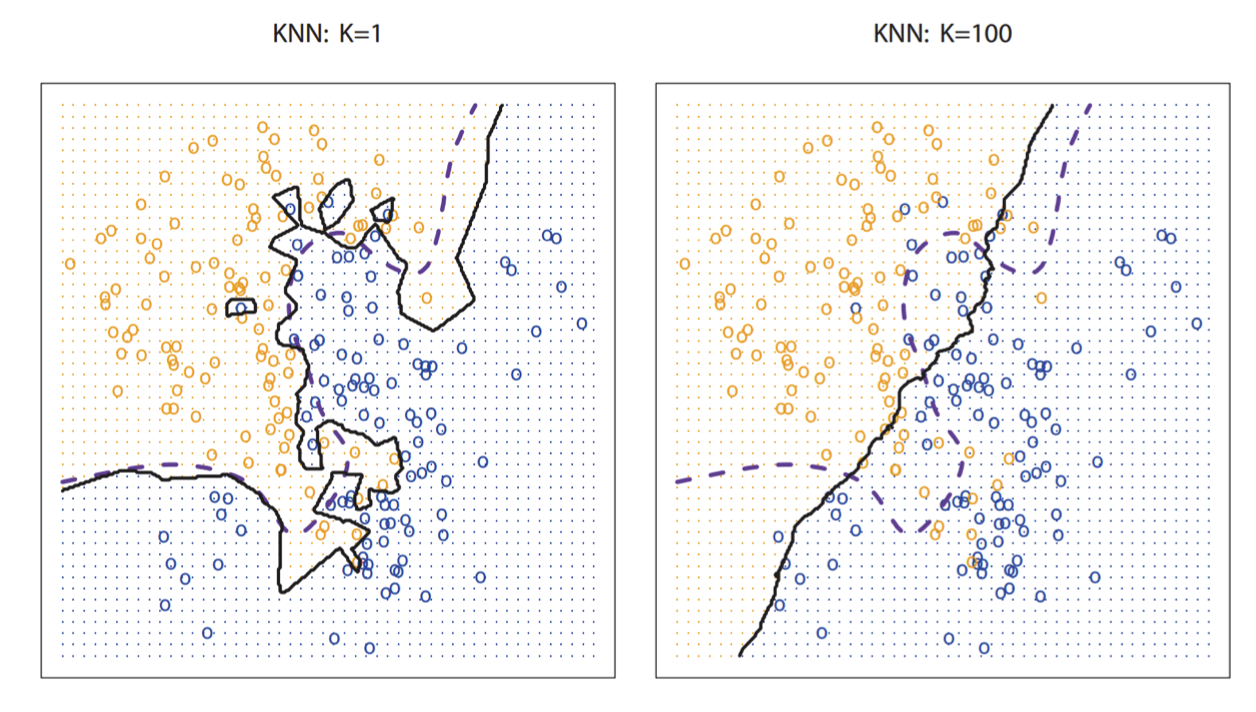

In [25]:
from IPython.display import Image, display

# Bild anzeigen
image_path = "media/knn.png"  # Pfad zum Bild
display(Image(filename=image_path))

### Erklärung
Auswirkungen der Wahl des Hyperparameters $k$ in KNN. Ist $k$ zu gering, werden die Trainingsdaten zu stark auswendig gelernt und es kommt zur Überanpassung. Ist $k$ zu hoch, ist das Modell nicht flexibel genug und es kommt zur Unteranpassung. 

## Die Fehlerrate auf den Test- und Trainingsdaten in Abhängigkeit von k

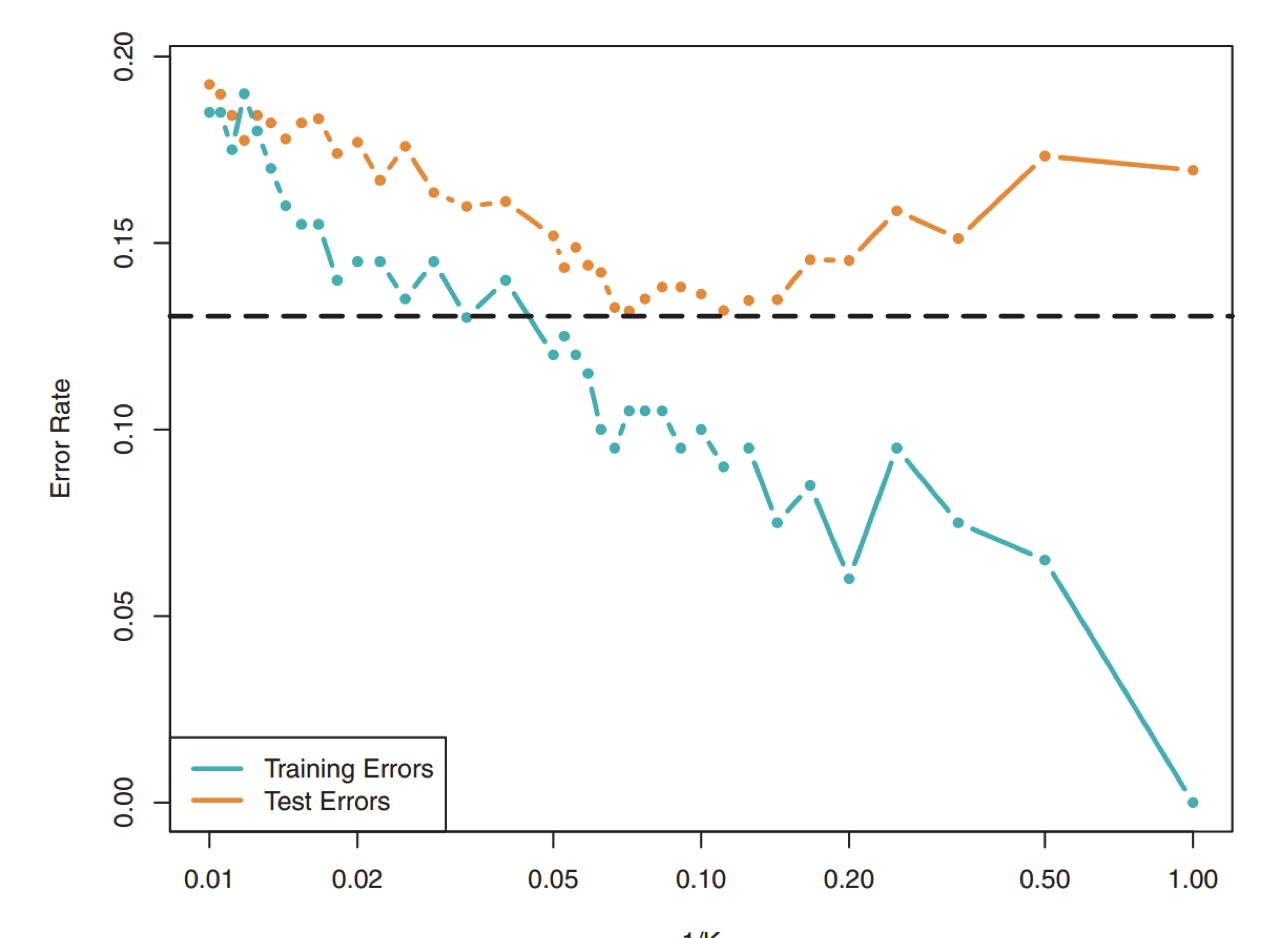

In [27]:
image_path = "media/knn_fehlerrate.png"  # Pfad zum Bild
display(Image(filename=image_path))

Eine effiziente Implementierung von KNN ist algorithmisch herausfordernd und ist immer noch Stand der Forschung. Ein naiver Ansatz ist es, bei jeder von $t$ Klassifikationen, die euklidischen Abstände zu allen $n$ Trainingsdaten zu berechnen und danach zu ordnen, um die $k$ nächsten Punkte zu berechnen. Angenommen, $t$ ist in der Größenordnung von $n$, dann hat ein solcher Algorithmus eine Laufzeitkomplexität von

$$
O(n^2 \cdot \log n)
$$

was meist durch effiziente Datenstrukturen und Algorithmen in der Praxis reduziert wird.

## Zusammenfassung

- Bei KNN passiert keine wirkliche Komprimierung der Trainingsdaten; es speichert alle Daten und braucht diese auch für Vorhersagen auf neuen Beobachtungen.
- KNN basiert auf keiner Verteilungsannahme und keiner Annahme einer funktionalen Struktur; theoretisch kann KNN beliebig komplexe Muster lernen.
- Standardisierung: meist werden alle Features standardisiert; wenn zwei Features Werte auf unterschiedlichen Skalen annehmen, dann erhält das Feature mit der größeren Skala die größere Wichtigkeit (das gilt für die Euklidische Distanz und auch für die meisten anderen Distanzen).
- Je kleiner $k$, umso weniger glatt sind die Entscheidungsgrenzen.
- Die Genauigkeit von KNN kann stark verschlechtert werden durch Hinzufügen verrauschter oder irrelevanter Einflussgrößen.

## Ausblick

- KNN kann auch zur Prognose einer kontinuierlichen Zielgröße verwendet werden.
- Dazu berechnet man den Mittelwert der Zielgröße aller Beobachtungen in der Nachbarschaft.